In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import statsmodels.api as sm
import numpy as np

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
df = pd.read_csv('/content/drive/MyDrive/bài tập/Indian_housing_Delhi_data.csv')

In [8]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [106]:
drop_cols=['priceSqFt','isNegotiable','SecurityDeposit','currency','description','city','verificationDate','location']
df = df.drop(drop_cols,axis=1)

In [107]:
df.head()

,house_type,house_size,latitude,longitude,price,numBathrooms,numBalconies,Status
0,1 RK Studio Apartment,400 sq ft,28.55,77.25,22000,1.00,NaN,Furnished
1,1 RK Studio Apartment,400 sq ft,28.64,77.13,20000,1.00,NaN,Furnished
2,2 BHK Independent Floor,500 sq ft,28.62,77.05,8500,1.00,NaN,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",28.71,77.18,48000,3.00,NaN,Furnished
4,2 BHK Apartment,810 sq ft,28.72,77.13,20000,2.00,NaN,Unfurnished


In [108]:
df['num_bed'] = df['house_type'].str.split(' ',expand=True)[0]
df['BHK/RK'] = df['house_type'].str.split(' ',expand=True)[1]
df['House_type'] = df['house_type'].str.split(' ',expand=True)[2]
df['house_size(SqFt)']= df['house_size'].str.split(' ',expand=True)[0]

In [109]:
df.head()

,house_type,house_size,latitude,longitude,price,numBathrooms,numBalconies,Status,num_bed,BHK/RK,House_type,house_size(SqFt)
0,1 RK Studio Apartment,400 sq ft,28.55,77.25,22000,1.00,NaN,Furnished,1,RK,Studio,400
1,1 RK Studio Apartment,400 sq ft,28.64,77.13,20000,1.00,NaN,Furnished,1,RK,Studio,400
2,2 BHK Independent Floor,500 sq ft,28.62,77.05,8500,1.00,NaN,Semi-Furnished,2,BHK,Independent,500
3,3 BHK Independent House,"1,020 sq ft",28.71,77.18,48000,3.00,NaN,Furnished,3,BHK,Independent,"1,020"
4,2 BHK Apartment,810 sq ft,28.72,77.13,20000,2.00,NaN,Unfurnished,2,BHK,Apartment,810


In [110]:
drop_cols = ['house_type','house_size']
df = df.drop(drop_cols,axis=1)

In [111]:
df.head()

,latitude,longitude,price,numBathrooms,numBalconies,Status,num_bed,BHK/RK,House_type,house_size(SqFt)
0,28.55,77.25,22000,1.00,NaN,Furnished,1,RK,Studio,400
1,28.64,77.13,20000,1.00,NaN,Furnished,1,RK,Studio,400
2,28.62,77.05,8500,1.00,NaN,Semi-Furnished,2,BHK,Independent,500
3,28.71,77.18,48000,3.00,NaN,Furnished,3,BHK,Independent,"1,020"
4,28.72,77.13,20000,2.00,NaN,Unfurnished,2,BHK,Apartment,810


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          5000 non-null   object 
 1   city              5000 non-null   object 
 2   latitude          5000 non-null   float64
 3   longitude         5000 non-null   float64
 4   price             5000 non-null   int64  
 5   numBathrooms      4975 non-null   float64
 6   numBalconies      2737 non-null   float64
 7   verificationDate  5000 non-null   object 
 8   Status            5000 non-null   object 
 9   num_bed           5000 non-null   object 
 10  BHK/RK            5000 non-null   object 
 11  House_type        5000 non-null   object 
 12  house_size(SqFt)  5000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 507.9+ KB


In [112]:
df['num_bed'] = df['num_bed'].astype('int')
df['numBathrooms'] = df['numBathrooms'].fillna(df['num_bed'].median())
df['numBalconies'] = df['numBalconies'].fillna(df['numBathrooms'].median())

In [113]:
df['house_size(SqFt)'] = df['house_size(SqFt)'].str.replace(',','')
num_cols = ['house_size(SqFt)','numBathrooms']
cat_cols = ['location','Status','BHK/RK','House_type']
df[num_cols] = df[num_cols].astype('int')
df[cat_cols] = df[cat_cols].astype('category')

KeyError: "['location'] not in index"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   location          5000 non-null   category
 1   city              5000 non-null   object  
 2   latitude          5000 non-null   float64 
 3   longitude         5000 non-null   float64 
 4   price             5000 non-null   int64   
 5   numBathrooms      5000 non-null   int64   
 6   numBalconies      5000 non-null   float64 
 7   verificationDate  5000 non-null   category
 8   Status            5000 non-null   category
 9   num_bed           5000 non-null   int64   
 10  BHK/RK            5000 non-null   category
 11  House_type        5000 non-null   category
 12  house_size(SqFt)  5000 non-null   int64   
dtypes: category(5), float64(3), int64(4), object(1)
memory usage: 355.2+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   location            5000 non-null   category
 1   latitude            5000 non-null   float64 
 2   longitude           5000 non-null   float64 
 3   price               5000 non-null   int64   
 4   numBathrooms        5000 non-null   int64   
 5   numBalconies        5000 non-null   float64 
 6   verificationDate    5000 non-null   category
 7   Status              5000 non-null   category
 8   num_bed             5000 non-null   int64   
 9   BHK/RK              5000 non-null   category
 10  House_type          5000 non-null   category
 11  house_size(SqFt)    5000 non-null   int64   
 12  distance_to_center  5000 non-null   int64   
dtypes: category(5), float64(3), int64(5)
memory usage: 355.2 KB


In [114]:
from geopy.distance import geodesic

In [115]:
centrer_delhi = ['28.6815','77.2228']
def calculate_distance(row, centrer_delhi):
  point = (row['latitude'], row['longitude'])
  return geodesic(point, centrer_delhi).kilometers


In [116]:
df['distance_to_center'] = df.apply(calculate_distance, axis=1, centrer_delhi=centrer_delhi)
df['distance_to_center'] = df['distance_to_center'].astype('int')

In [52]:
df.head()

,location,latitude,longitude,price,numBathrooms,numBalconies,Status,num_bed,BHK/RK,House_type,house_size(SqFt),distance_to_center
0,Kalkaji,28.55,77.25,22000,1,3.00,Furnished,1,RK,Studio,400,15
1,Mansarover Garden,28.64,77.13,20000,1,3.00,Furnished,1,RK,Studio,400,9
2,Uttam Nagar,28.62,77.05,8500,1,3.00,Semi-Furnished,2,BHK,Independent,500,17
3,Model Town,28.71,77.18,48000,3,3.00,Furnished,3,BHK,Independent,1020,5
4,Sector 13 Rohini,28.72,77.13,20000,2,3.00,Unfurnished,2,BHK,Apartment,810,10


In [21]:
pd.options.display.float_format = '{:.2f}'.format

In [117]:
df.describe()

,latitude,longitude,price,numBathrooms,numBalconies,num_bed,house_size(SqFt),distance_to_center
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,28.58,77.17,222173.82,2.92,2.43,3.10,2982.89,14.36
std,0.19,0.12,273984.30,1.09,0.66,1.16,2168.66,22.57
min,20.01,72.77,3000.00,1.00,1.00,1.00,150.00,1.00
25%,28.54,77.14,29500.00,2.00,2.00,2.00,1100.00,12.00
50%,28.57,77.20,125000.00,3.00,2.00,3.00,2500.00,14.00
75%,28.62,77.23,301102.00,4.00,3.00,4.00,5896.00,16.00
max,28.81,80.36,3010101.00,10.00,8.00,12.00,14521.00,1023.00


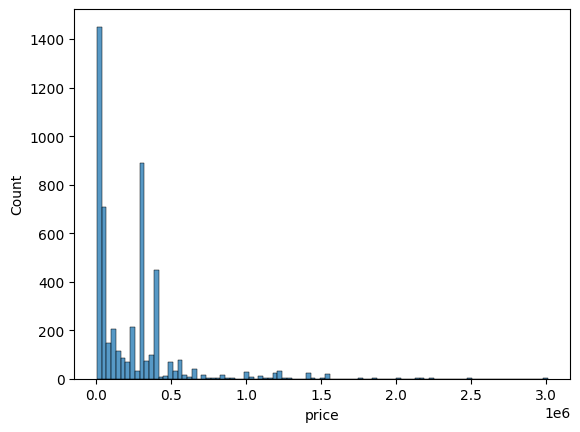

In [118]:
seaborn.histplot(df['price'])
plt.show()

In [119]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [121]:
df_corr = df.corr(numeric_only=True)

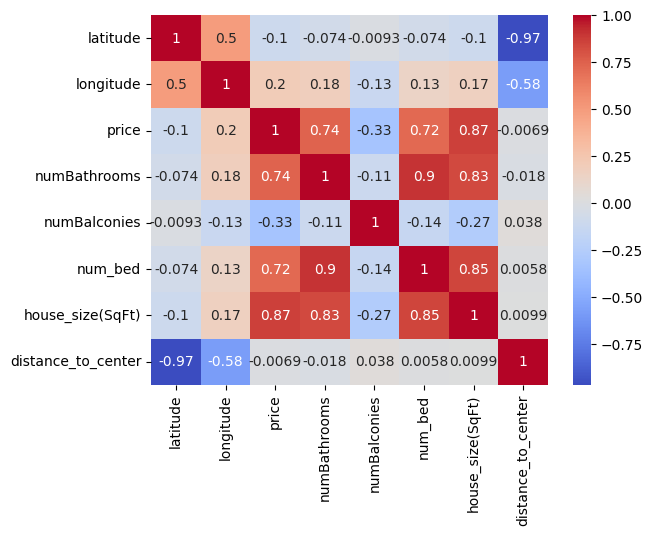

In [122]:
seaborn.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.show()

In [123]:
y = df['price']
x = df[['house_size(SqFt)', 'numBathrooms', 'numBalconies','distance_to_center']]
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              9638.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):                        0.00
Time:                        15:57:31   Log-Likelihood:                         -61148.
No. Observations:                4803   AIC:                                  1.223e+05
Df Residuals:                    4799   BIC:                                  1.223e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [124]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
new_data = {
    'house_size(SqFt)': [500,500,500,500,400]
    ,'numBathrooms': [5,5,5,4,5]
    ,'numBalconies': [5,5,4,5,5]
    ,'distance_to_center': [5,10,5,5,5]
}
new_data_df = pd.DataFrame(new_data)
predictions = model.predict(new_data_df)
print(predictions)

0   29474.02
1   29367.03
2   50889.82
3    8104.10
4   23511.94
dtype: float64


In [125]:
y = df['price']
X = df[['house_size(SqFt)', 'numBathrooms', 'numBalconies','distance_to_center']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = model.predict(X_test)

linear_mse = np.mean((y_test - predictions) ** 2)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = model.rsquared
print('mse:',linear_mse)
print('rmse:',linear_rmse)
print('R-squared:', linear_r2)

mse: 7357580014.641359
rmse: 85776.33714866449
R-squared: 0.8893017990174952


In [126]:
df['price'].describe()

,price
count,4803.00
mean,179790.15
std,167765.83
min,3000.00
25%,27500.00
50%,110000.00
75%,301022.00
max,704405.00


In [127]:
df_encoding = pd.get_dummies(df, columns=['Status', 'BHK/RK', 'House_type'], drop_first=True)

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
y = df_encoding['price']
x = df_encoding.drop('price', axis=1)

In [129]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
# Fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(oob_score=True, random_state=0)

In [130]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
rf_mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {rf_mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.8888006805164649
Mean Squared Error: 1624925868.4555562
R-squared: 0.9422546596482569


In [131]:
# Assuming `regressor` is your fitted Random Forest model
feature_importances = regressor.feature_importances_

# Get feature names
feature_names = x.columns

# Create a DataFrame for feature importances
importance_df1 = pd.DataFrame({
    'Feature'   : feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df1 = importance_df1.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df1)


                   Feature  Importance
5         house_size(SqFt)        0.89
1                longitude        0.03
0                 latitude        0.03
3             numBalconies        0.01
10  House_type_Independent        0.01
8       Status_Unfurnished        0.01
6       distance_to_center        0.01
4                  num_bed        0.01
2             numBathrooms        0.01
12        House_type_Villa        0.00
7    Status_Semi-Furnished        0.00
13    House_type_penthouse        0.00
9                BHK/RK_RK        0.00
11       House_type_Studio        0.00


In [103]:
df.head()

,location,latitude,longitude,price,numBathrooms,numBalconies,Status,num_bed,BHK/RK,House_type,house_size(SqFt),distance_to_center
0,Kalkaji,28.55,77.25,22000,1,3.00,Furnished,1,RK,Studio,400,15
1,Mansarover Garden,28.64,77.13,20000,1,3.00,Furnished,1,RK,Studio,400,9
2,Uttam Nagar,28.62,77.05,8500,1,3.00,Semi-Furnished,2,BHK,Independent,500,17
3,Model Town,28.71,77.18,48000,3,3.00,Furnished,3,BHK,Independent,1020,5
4,Sector 13 Rohini,28.72,77.13,20000,2,3.00,Unfurnished,2,BHK,Apartment,810,10


XGBoost - MSE: 3920729600.0
XGB R2: 0.8628256320953369


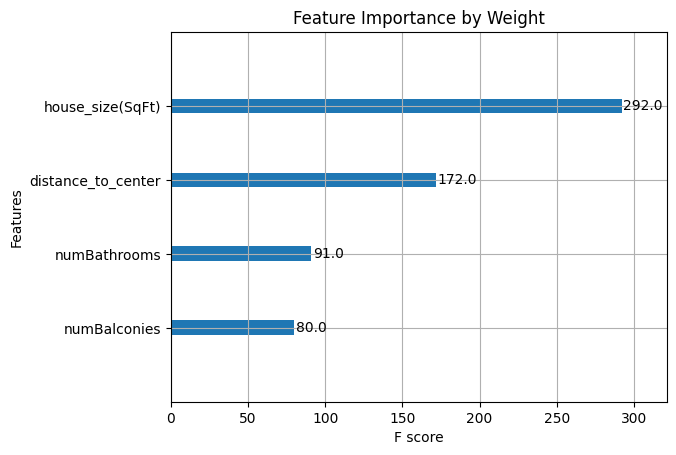

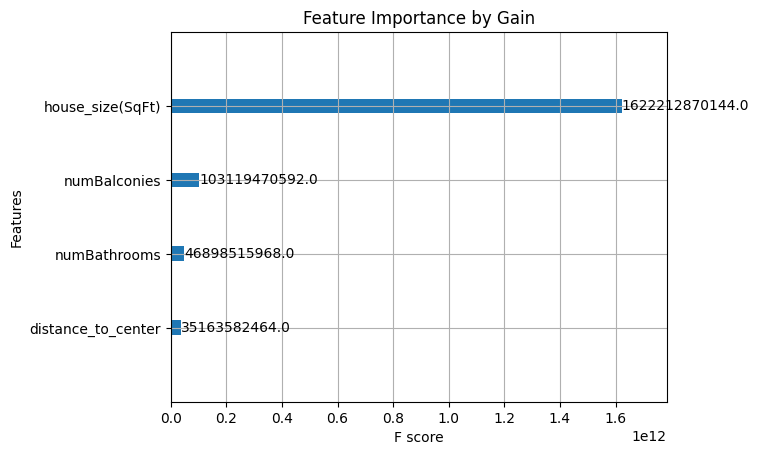

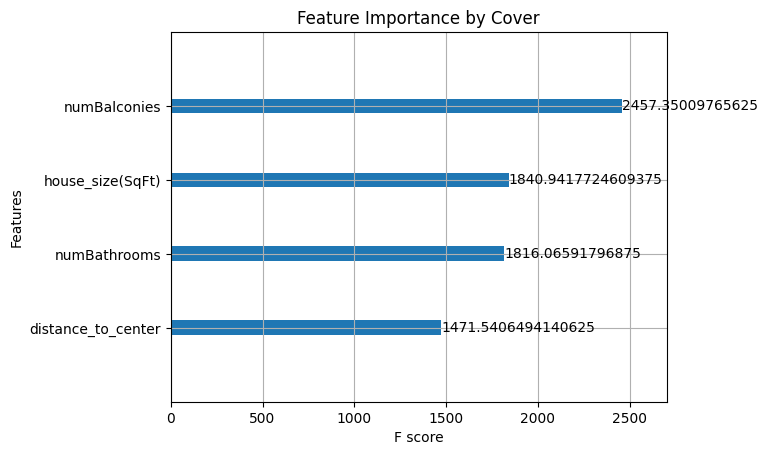

In [95]:
import xgboost as xgb
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost - MSE: {xgb_mse}')
print(f'XGB R2: {xgb_r2}')
# Plot feature importance based on weight
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance by Weight')
plt.show()

# Plot feature importance based on gain
xgb.plot_importance(xgb_model, importance_type='gain')
plt.title('Feature Importance by Gain')
plt.show()

# Plot feature importance based on cover
xgb.plot_importance(xgb_model, importance_type='cover')
plt.title('Feature Importance by Cover')
plt.show()



In [92]:
# Collecting the results
results_dict = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [linear_mse, rf_mse, xgb_mse],
    'R-squared': [linear_r2, r2, xgb_r2],
    'OOB Score': [None, oob_score, None]  # Only Random Forest has OOB score
}

# Create the DataFrame
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)


               Model           MSE  R-squared  OOB Score
0  Linear Regression 7018888617.94       0.89        NaN
1      Random Forest 1623730358.93       0.94       0.89
2            XGBoost 3920729600.00       0.86        NaN
